CIFAR10_DATASET_TRAIN_TEST

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

KERAS FROM TENSORFLOW IS THE MAIN LIBRARY AND IMPORT CIFAR10 DATASET FROM IT'S PRELOADED DATASET




THERE ARE 10 CLASSES TOTAL IN CIFAR DATASET

CLASSES=AIRPLANE,AUTOMOBILE,BIRD,CAT,DEER,DOG,FROG,HORSE,SHIP,TRUCK

TAKING A BATCH SIZE 64 AND 50 EPOCHS TO COMPLETE THE TRAINING

In [5]:
batch_size=64
num_classes=10
epochs=50
data_augmentation=False

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data() #taking cifar data as dataset 
X_train.shape

(50000, 32, 32, 3)

SHAPE OF TRAINING AND TESTING DATA
50000 TRAINING DATA AND SHAPE IS 32,32 AND RGB

10000 DATA FOR TESTING

In [4]:
print('X_train.shape: ',X_train.shape)
print('y_train.shape: ',y_train.shape)
print('train samples: ',X_train.shape[0])
print('test samples: ',X_test.shape[0])

X_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
train samples:  50000
test samples:  10000


PLOTING DISTRIBUTION OF DATA 
WHERE THERE IS A GRAPH SHOWS THE DATASET COUNT AND CLASSES

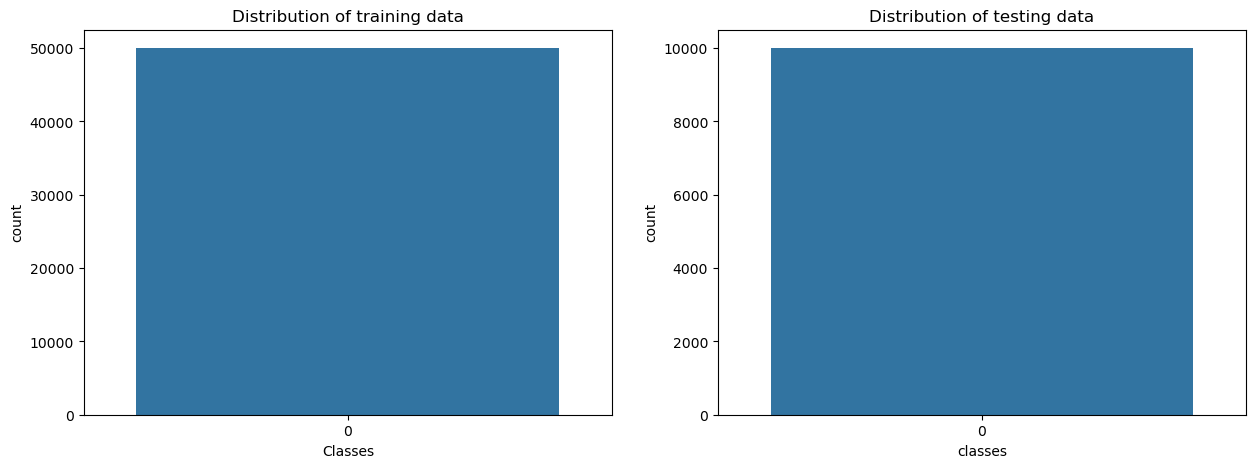

In [6]:
fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.countplot(y_train.ravel(),ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(),ax=axs[1])
axs[1].set_title('Distribution of testing data')
axs[1].set_xlabel('classes')
plt.show()


NORMALIZE THE DATA BY DIVIDING TRAIN AND TEST DATA BY 255, SO WE CAN GET VALUES FROM 0 TO 1

USED ONE HOT ENCODING TO GET THE CATEGORIES NUMERIC

In [7]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

#ONE HOT ENCODING
y_train=tf.keras.utils.to_categorical(y_train,num_classes)
y_test=tf.keras.utils.to_categorical(y_test,num_classes)


*DOING THE CONVOLUTION USING 3 BY 3 FILTERS

*USED RELU AS ACTIVATION FUNCTION

*BATCH NORMALIZATION FOR NORMALIZATION

*DROPOUT FOR REGULARIZATION

*MAXPOOLING FOR REDUCING THE PARAMETRES AND COMPUTATION

*ATLAST WE USED SOFTMAX ACTIVATION FUNCTION AS WE HAVE 10 CLASSES

THEN GET THE WHOLE MODEL SUMMARY

*USED RMSPROP FOR OPTIMIZATION WITH LEARNING RATE 0.0001 AND A DECAY OF 1e-6

*FOR LOSS FUNCTION,USED CATEGORICAL_CROSSENTROPY

In [8]:
#DEFINE THE CONVERTS
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

rms=tf.keras.optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=rms,metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0

DONE THE TRAINING IN BELLOW SECTION

AFTER TRAINING, GET A TRAINING ACCURACY OF 0.8846

In [10]:
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),shuffle=True)


Epoch 1/50
782/782 [==============================] - 219s 280ms/step - loss: 2.2365 - accuracy: 0.3427 - val_loss: 1.3705 - val_accuracy: 0.5204
Epoch 2/50
782/782 [==============================] - 203s 260ms/step - loss: 1.6496 - accuracy: 0.4667 - val_loss: 1.2131 - val_accuracy: 0.5746
Epoch 3/50
782/782 [==============================] - 197s 252ms/step - loss: 1.3898 - accuracy: 0.5368 - val_loss: 1.0845 - val_accuracy: 0.6214
Epoch 4/50
782/782 [==============================] - 198s 253ms/step - loss: 1.2214 - accuracy: 0.5850 - val_loss: 1.0546 - val_accuracy: 0.6315
Epoch 5/50
782/782 [==============================] - 232s 296ms/step - loss: 1.1077 - accuracy: 0.6201 - val_loss: 0.9881 - val_accuracy: 0.6607
Epoch 6/50
782/782 [==============================] - 205s 262ms/step - loss: 1.0165 - accuracy: 0.6498 - val_loss: 0.9800 - val_accuracy: 0.6592
Epoch 7/50
782/782 [==============================] - 199s 254ms/step - loss: 0.9538 - accuracy: 0.6697 - val_loss: 0.8666 -

BELOW, PLOT THE GRAPH WHERE IT SHOWS THE ACCURACY AND LOSS IN TWO DIFFERENT GRAPH

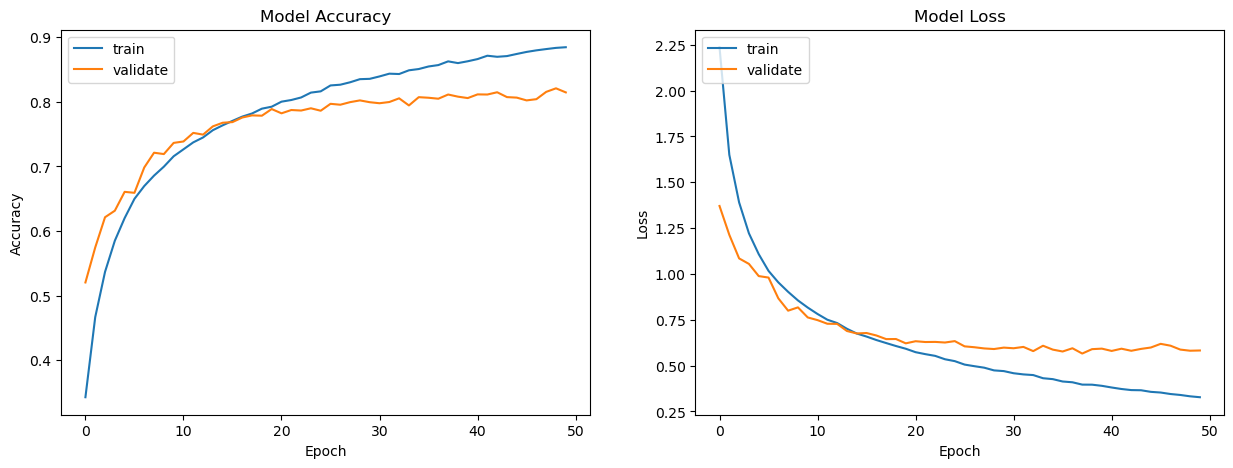

In [14]:
fig,axs=plt.subplots(1,2,figsize=(15,5))

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train' ,'validate'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train' ,'validate'], loc='upper left')
plt.show()


GET A TEST ACCURACY OF 0.8147
AND A TEST LOSS OF 0.5823

In [13]:
scores=model.evaluate(X_test,y_test,verbose=1)
print('Test Accuracy:', scores[1])
print('Test Loss:', scores[0])



313/313 [==============================] - 7s 21ms/step - loss: 0.5823 - accuracy: 0.8147
Test Accuracy: 0.8147000074386597
Test Loss: 0.5823111534118652
